In [0]:
!sudo add-apt-repository ppa:alex-p/tesseract-ocr-devel -y
!sudo apt-get update
!apt install tesseract-ocr
!apt install libtesseract-dev
!pip install pytesseract
!pip install imantics
!pip install python-Levenshtein

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/alex-p/tesseract-ocr-devel/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Reading package lists... Done
Hit:1 http://securit

In [0]:
#importing tools for data visualisation, math operations with matrices and tensors(Keras, numpy), and text extraction(pytesseract)
from google.colab import drive
from keras import utils
import keras_preprocessing.image.utils as image_utils
from PIL import Image, ImageDraw
from imantics import Mask
import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pytesseract
import pandas as pd
import csv
from Levenshtein import *


WORKDIR = "src/Text extraction"

Mounted at /content/drive


**Get an image and convert to grayscale**

In [0]:
def showImage(name):
  img = cv2.imread(name)
  return img

def getCvImage(name):
  gray = cv2.imread(name, cv2.IMREAD_GRAYSCALE)
  for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
      gray[i][j] = 255 - gray[i][j]
  return gray

**Loading fonts**

In [0]:
!cp 'src/Text extraction/traineddata/SupernormalW00.traineddata' /usr/share/tesseract-ocr/5/tessdata/SupernormalW00.traineddata

In [0]:
!cp 'src/Text extraction/traineddata/game_score.traineddata' /usr/share/tesseract-ocr/5/tessdata/game_score.traineddata

In [0]:
score1_filename = WORKDIR + "/datasets/tesseract_score/validation/1_1.png"
score2_filename = WORKDIR + "/datasets/tesseract_score/validation/2_1.png"
stat1_filename = WORKDIR + "/datasets/tesseract_stats/validation/1_1.png"
stat2_filename = WORKDIR + "/datasets/tesseract_stats/validation/2_1.png"

**Loading images**

In [0]:
img1 = showImage(score1_filename)
img2 = showImage(score2_filename)
img3 = showImage(stat1_filename)
img4 = showImage(stat2_filename)

**Score 1**

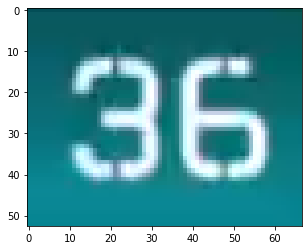

In [0]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

**Score 2**

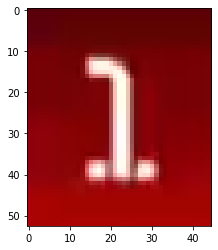

In [0]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

**Stat 1**

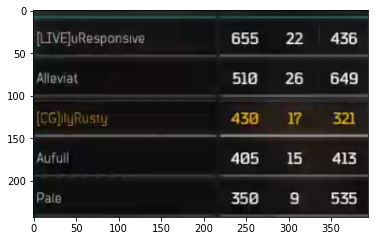

In [0]:
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

**Stat 2**

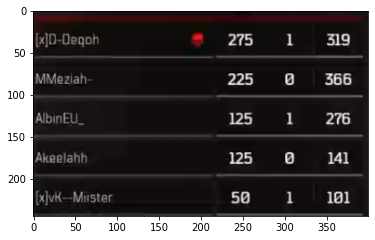

In [0]:
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))

**Convert image to grayscale**

In [0]:
img1 = getCvImage(score1_filename)
img2 = getCvImage(score2_filename)
img3 = getCvImage(stat1_filename)
img4 = getCvImage(stat2_filename)

**Predictions**

In [0]:
print("Score 1: ")
print(pytesseract.image_to_string(img1, lang = "game_score", config = '--psm 6 -c tessedit_char_whitelist="0123456789"'))
print("\n")
print("Score 2: ")
print(pytesseract.image_to_string(img2, lang = "game_score", config = '--psm 6 -c tessedit_char_whitelist="0123456789"'))
print("\n")
print("Stat 1: ")
print(pytesseract.image_to_string(img3, lang = "SupernormalW00", config = '--psm 6 -c tessedit_char_whitelist="0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ[]_- "'))
print("\n")
print("Stat2: ")
print(pytesseract.image_to_string(img4, lang = "SupernormalW00", config = '--psm 6 -c tessedit_char_whitelist="0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ[]_- "'))
print("\n")

Score 1: 
36


Score 2: 
1


Stat 1: 
[LIVE]uResponsie 655 22 436
Alleviat 510 26 649
[CG]ilyRusty 430 17 321
Aufull 405 15 413
Pale 350 9 535


Stat2: 
[x]D-Deqoh - 275 1 319
MMeziah- 225 0 366
AlbinEU_ 125 1 276
Akeelahh 125 0 141
[x]K--Mister


